In [1]:
# Testing how well sunpy works with sswidl map2fits.pro produced files
# files are created with sxi_rotfix.pro

In [2]:
from __future__ import print_function, division
from datetime import timedelta
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# could use the sunpy colormaps instead
import sunpy.cm as scm

from matplotlib.colors import LogNorm
from pylab import figure, cm
%matplotlib inline

import astropy.time
from astropy.io import fits
from astropy import units as u

from sunpy import sun
import sunpy.map


In [3]:
# Let's start by trying to load in the SXI fits outputted but map2fits.pro
# https://hesperia.gsfc.nasa.gov/ssw/gen/idl/maps/map2fits.pro

infile='oSXI_20150901_033615.fits'
sxi_map = sunpy.map.Map(infile)
sxi_map.peek(draw_limb=True,draw_grid=15*u.deg)
# Does not work

/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/time/time.py:178: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if isinstance(time_string, pandas.tslib.Timestamp):
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:675: Warning: Unknown value for CUNIT1
  warnings.warn("Unknown value for "+meta_property.upper(), Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:675: Warning: Unknown value for CUNIT2
  warnings.warn("Unknown value for "+meta_property.upper(), Warning)


ValueError: 'arcsecs' did not parse as unit: At col 0, arcsecs is not a valid unit. Did you mean arcsec?

/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1604: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/wcs/wcs.py:232: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(rsun_meters ** 2 - x ** 2 - y ** 2)


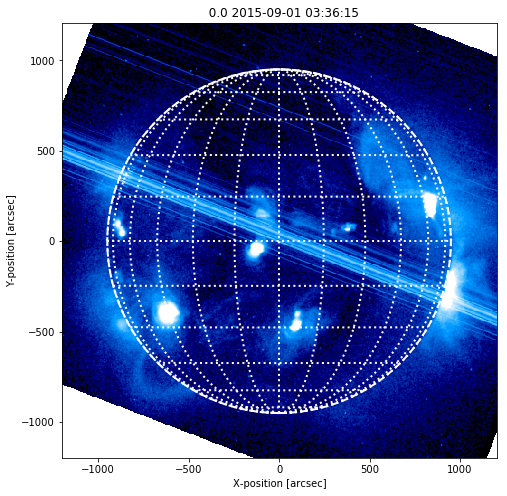

In [4]:
# now try the one from my tweaked map2fits_sunpy.pro

infile2='SXI_20150901_033615.fits'

sxi_map = sunpy.map.Map(infile2)
plt.figure(figsize=(10, 8))
plt.subplot()
sxi_map.plot_settings['cmap'] = scm.get_cmap('stereohi1')
sxi_map.plot_settings['norm'] = colors.LogNorm(1,1e3)
sxi_map.plot()
sxi_map.draw_limb(color='white',linewidth=2,linestyle='dashed')  
sxi_map.draw_grid(color='white',linewidth=2,linestyle='dotted')
plt.show()

#sxi_map.peek(draw_limb=True,draw_grid=15*u.deg)
#sxi_map.meta